In [1]:
# Predict calories based on other variables in starbucks drinks

In [32]:
# Load Libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotnine import *
import numpy as np # linear algebra
# import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
path = "D:\\Fun Projects\\Starbucks\\data\\starbucks-menu-nutrition-food.csv"
df0=pd.read_csv("D:\\Fun Projects\\Starbucks\\data\\starbucks-menu-nutrition-food.csv", encoding='unicode_escape')
df0.head()

#modify the column names
df0.columns = ['name', 'calories','fat','carbs','fiber','protein']
df0.head()

,name,calories,fat,carbs,fiber,protein
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [4]:
df = df0
# Use melt function for the histograms
df2 = pd.melt(df, id_vars=['name'])
df2.head()

,name,variable,value
0,Chonga Bagel,calories,300.0
1,8-Grain Roll,calories,380.0
2,Almond Croissant,calories,410.0
3,Apple Fritter,calories,460.0
4,Banana Nut Bread,calories,420.0


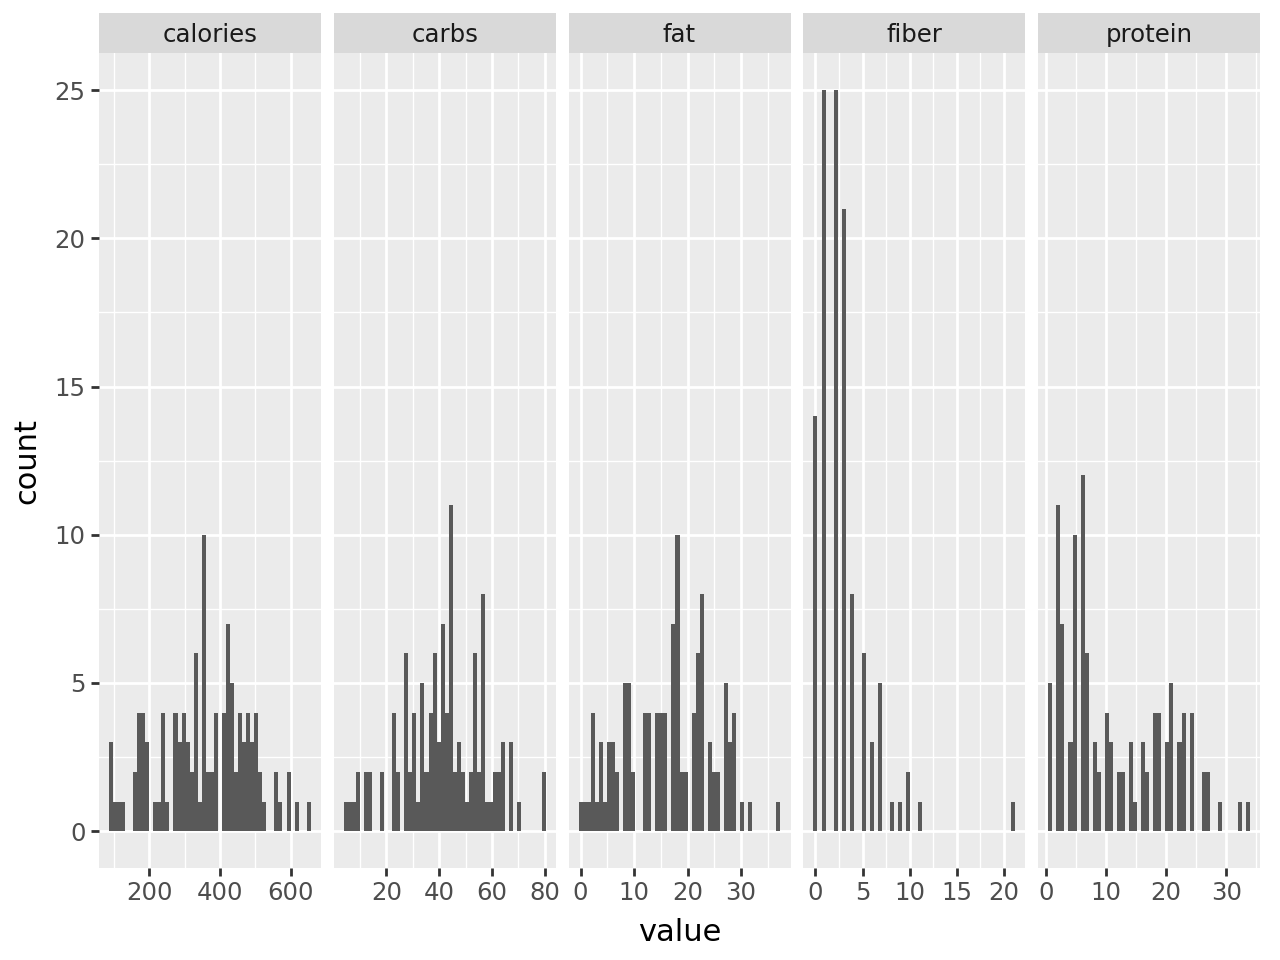

In [5]:
p = (
    ggplot(df2, aes("value"))
    + geom_histogram(bins=50)
    + facet_grid(". ~ variable", scales='free_x')
    )

p.show()

In [ ]:
# #convert data type to float for all the columns except name
# for i in df.columns[1:]:
#     df[i]=df[i].astype("float")
# df.info()

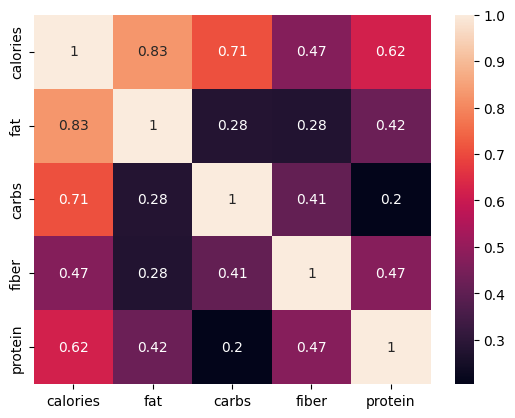

In [7]:
# Correlation plot
# plt.figure(figsize=(20,7))
sns.heatmap(df.iloc[:,1:].corr(),annot=True)
plt.show()

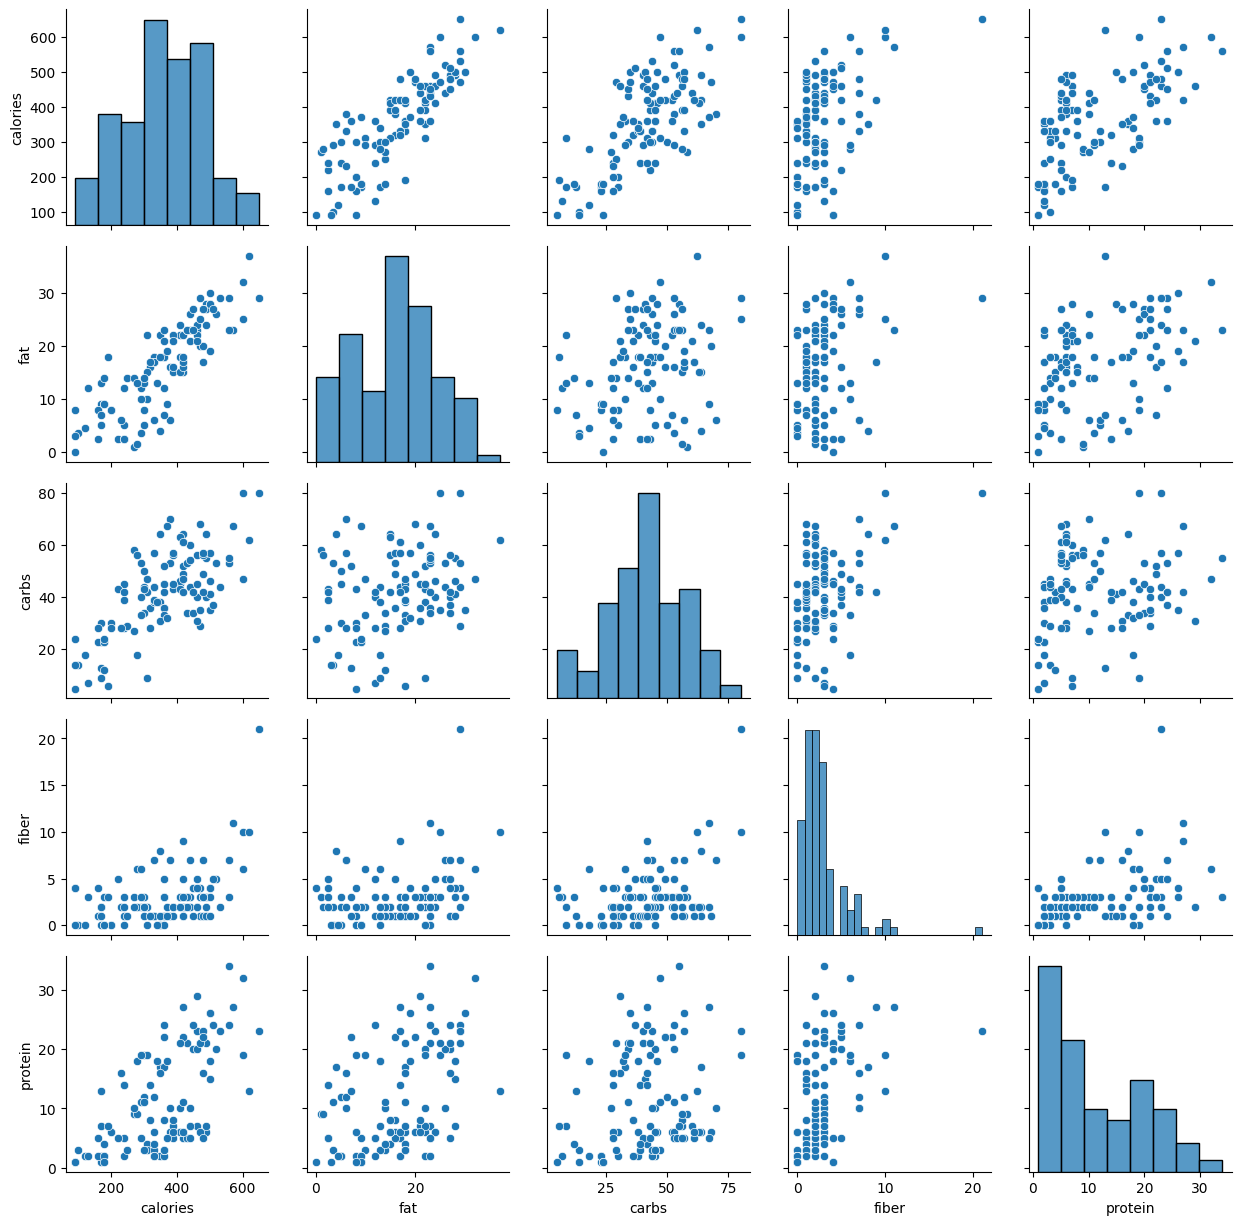

In [11]:
# Pairs plot
g = sns.PairGrid(df.iloc[:,1:], diag_sharey=False, corner=False)
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.scatterplot)
g.add_legend()
plt.show()

In [33]:
# Split data into train and test set
indices = range(len(df)) # Create a list of indices

# Get 3 random indices
random_indices = random.sample(indices, round(0.75*len(df)))

# Training dataset
data_train = df.iloc[random_indices,]

# Testing dataset
data_test = df.iloc[df.index.difference(random_indices),]

In [ ]:
# All the variables are positively correlated with calories which is good.
# We will aim to predict the calories as function of fat, carbs, fiber and protein

In [10]:
## All the variables (fat, carbs, fiber and protein) have p-value very close to 0. Also the r squared value is 99.5% so the model is really good

In [34]:
# Fit the OLS regression
result = smf.ols("calories ~ fat + carbs + fiber + protein", data = data_train).fit()
# check the summary
result.summary()
# dir(result) to check all the available objects we can gram from the results

# # This works as well
# # Fit the OLS regression using sm
# X0=df.iloc[:,2:]
# X = sm.add_constant(X0)
# y = df["calories"]
# result2 = sm.OLS(y,X).fit()
# # check the summary
# result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               calories   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     3199.
Date:                Fri, 09 May 2025   Prob (F-statistic):           2.19e-87
Time:                        19:06:02   Log-Likelihood:                -313.80
No. Observations:                  85   AIC:                             637.6
Df Residuals:                      80   BIC:                             649.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3541      3.574     -0.099      0.921      -7.467       6.759
fat            8.8491      0.150     58.926      0.000       8.550       9.148
carbs          3.9752      0.083     48.014      0.000       3.810       4.140
fiber         -0.8935      0.589     -1.517      0.133      -2.066       0.279
protein        4.3539      0.160     27.140      0.000       4.035       4.673
==============================================================================
Omnibus:                       11.283   Durbin-Watson:                   2.235
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.441
Skew:                           0.662   Prob(JB):                      0.00121
Kurtosis:                       4.429   Cond. No.                         161.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

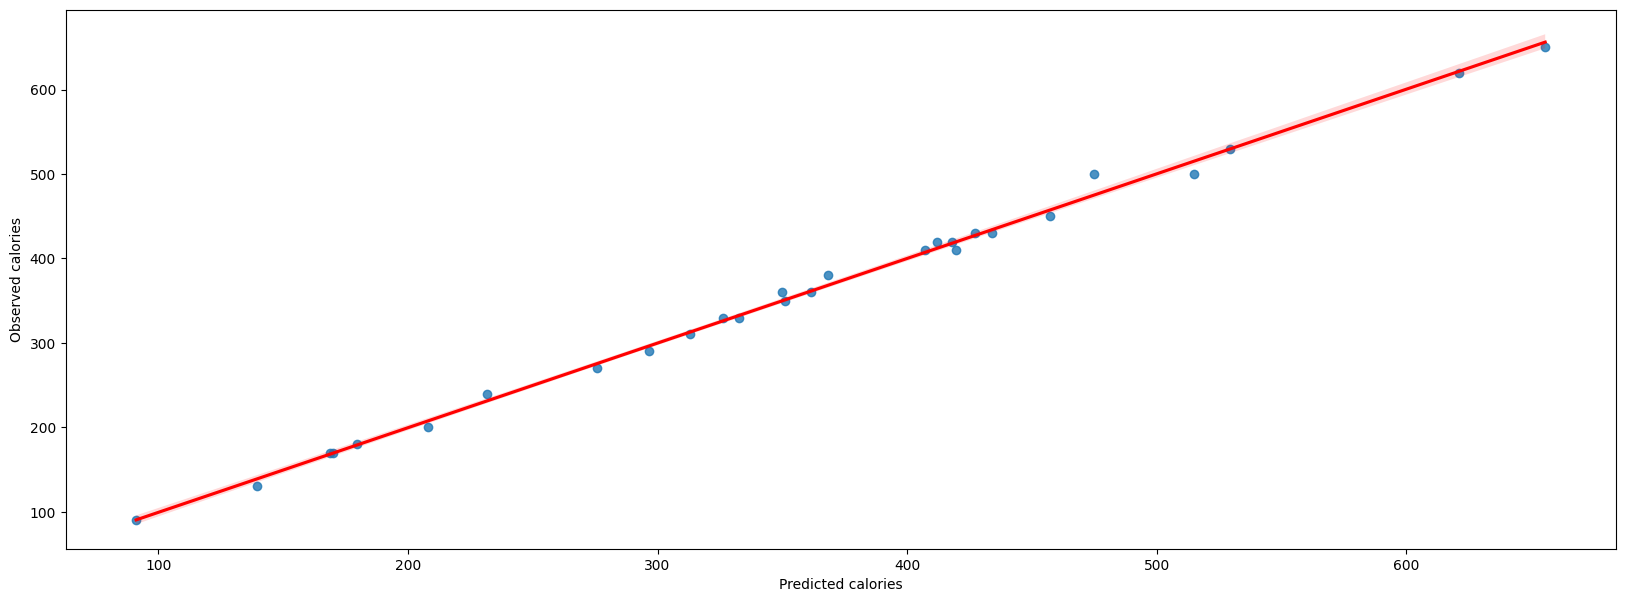

In [40]:
# model = OLS(labels[:half], data[:half])
# results = model.fit()
predictions = result.predict(data_test)

# Observed vs. Predicted plot
plt.figure(figsize=(20,7))
sns.regplot(y = data_test["calories"],x = predictions,line_kws={"color":"red"})
plt.ylabel("Observed calories")
plt.xlabel("Predicted calories")
plt.show()
# decent plot

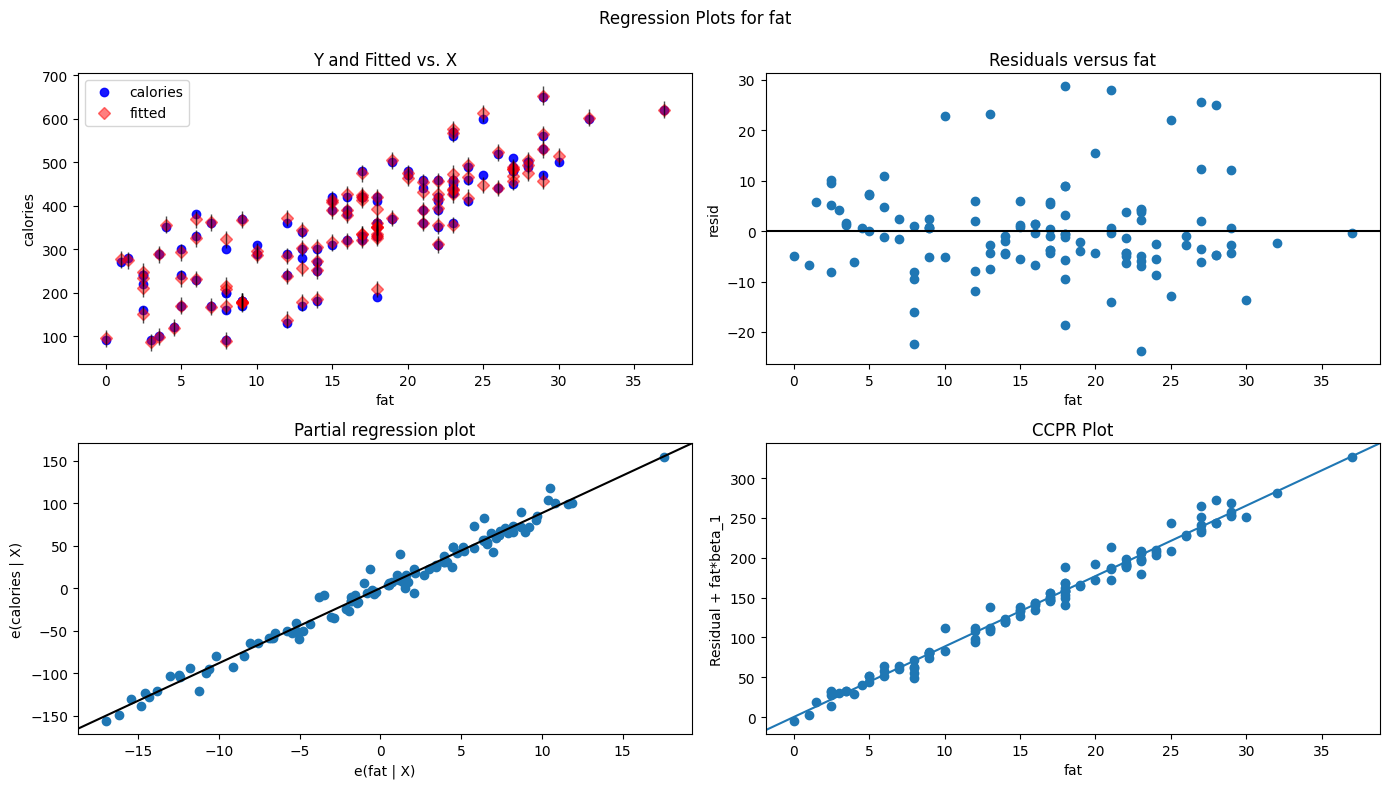

In [30]:
# creating regression plots 
# modify figure size 
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(result, 'fat', fig=fig) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      113 non-null    object 
 1   calories  113 non-null    float64
 2   fat       113 non-null    float64
 3   carbs     113 non-null    float64
 4   fiber     113 non-null    float64
 5   protein   113 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.4+ KB


In [52]:
# Sort the drinks in descending order with respect to calorie content
calories=df.sort_values(by="calories",ascending=False)
calories.head() #aximum calorie content is 650

,name,calories,fat,carbs,fiber,protein
102,Lentils & Vegetable Protein Bowl with Brown Rice,650.0,29.0,80.0,21.0,23.0
61,Green Goddess Avocado Salad,620.0,37.0,62.0,10.0,13.0
65,Roasted Turkey & Dill Havarti Sandwich,600.0,32.0,47.0,6.0,32.0
54,Strawberries & Jam Sandwich,600.0,25.0,80.0,10.0,19.0
70,Za'atar Chicken & Lemon Tahini Salad,570.0,23.0,67.0,11.0,27.0


In [53]:
calories.tail() # minimum calorie content is 90

,name,calories,fat,carbs,fiber,protein
39,Petite Vanilla Bean Scone,120.0,4.5,18.0,0.0,2.0
25,Everybody's Favorite - Bantam Bagel (2 Pack),100.0,3.5,14.0,0.0,3.0
27,Frappuccino® Cookie Straw,90.0,3.0,14.0,0.0,1.0
111,Organic Avocado (Spread),90.0,8.0,5.0,4.0,1.0
112,Seasonal Fruit Blend,90.0,0.0,24.0,4.0,1.0


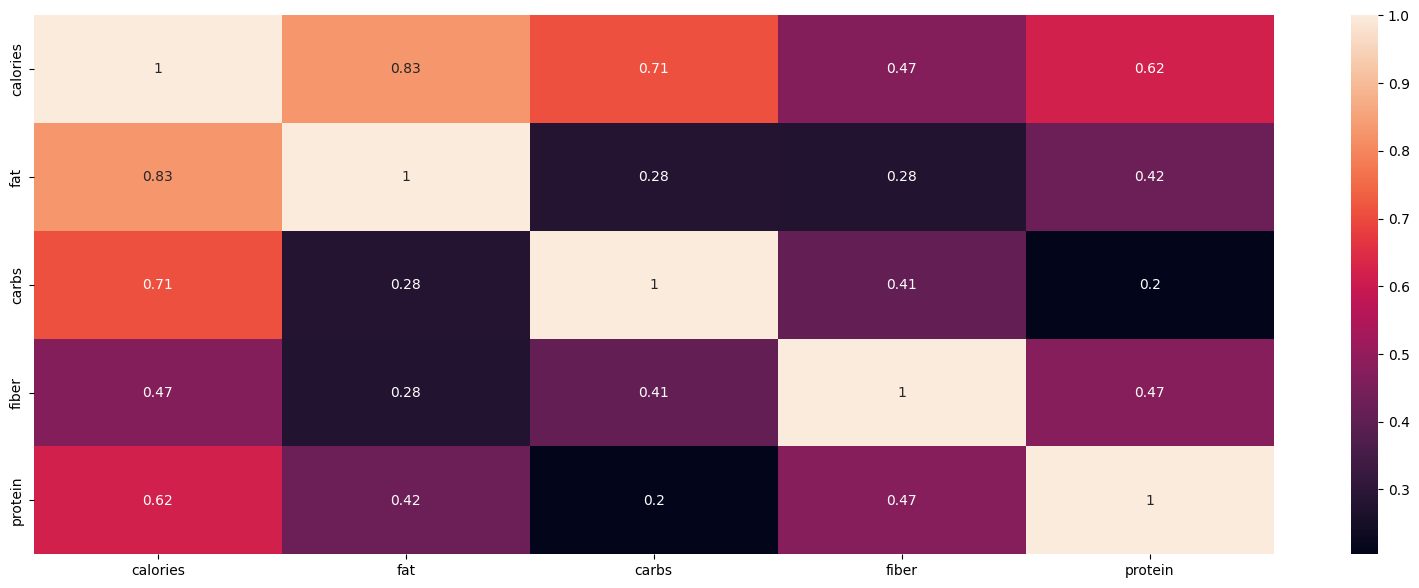

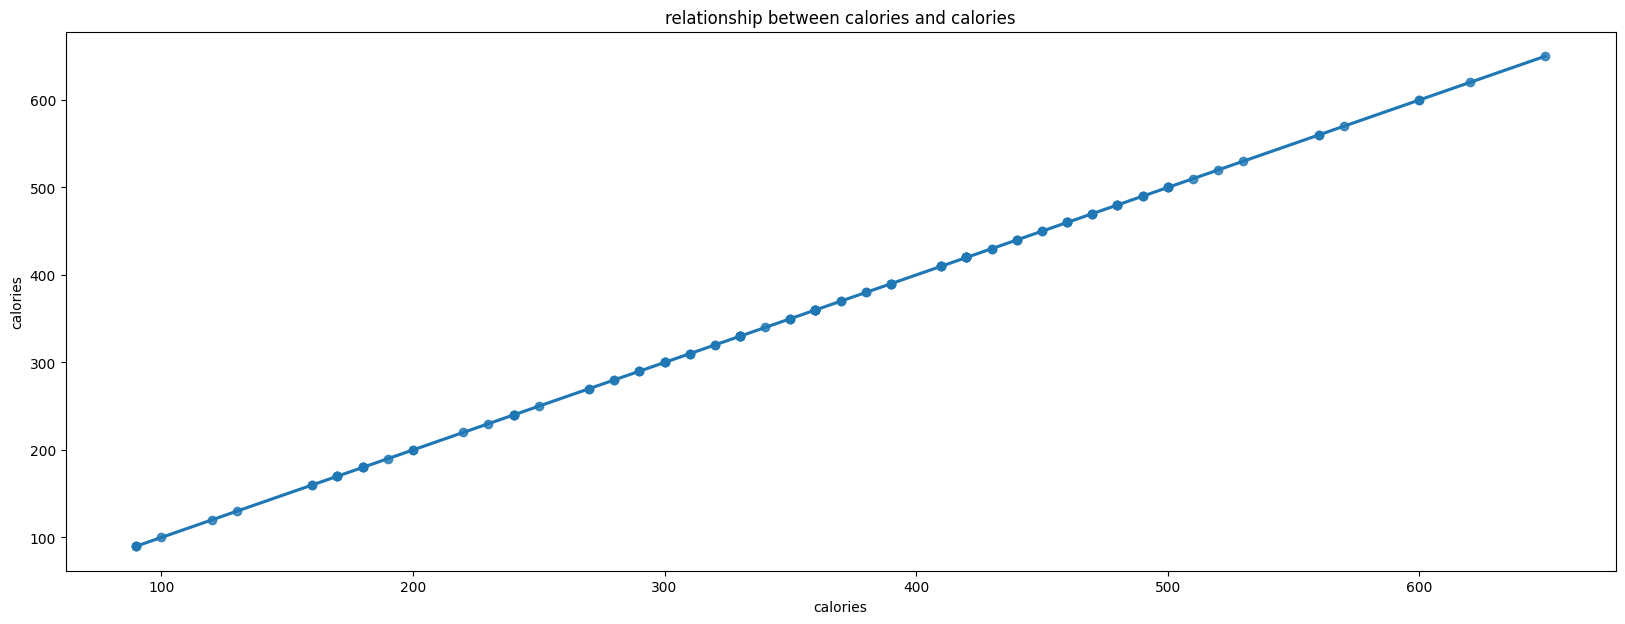

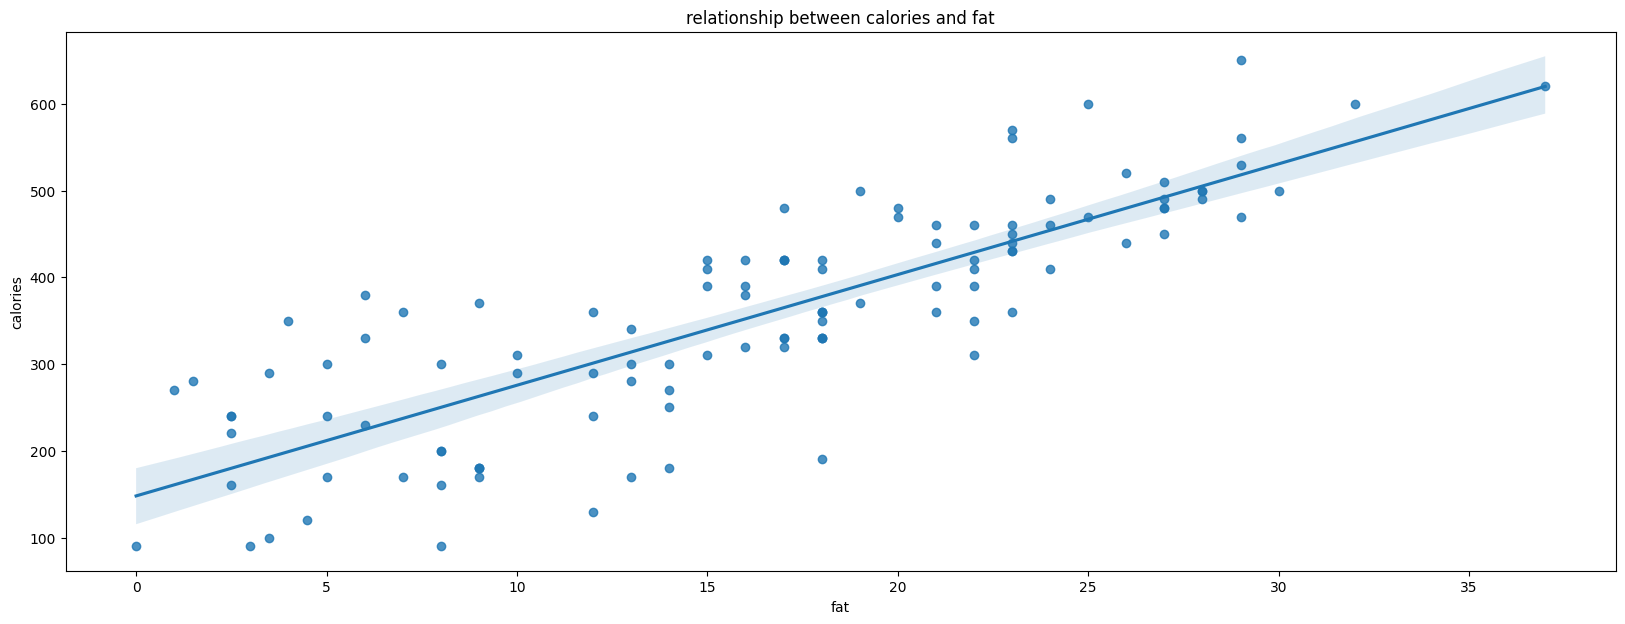

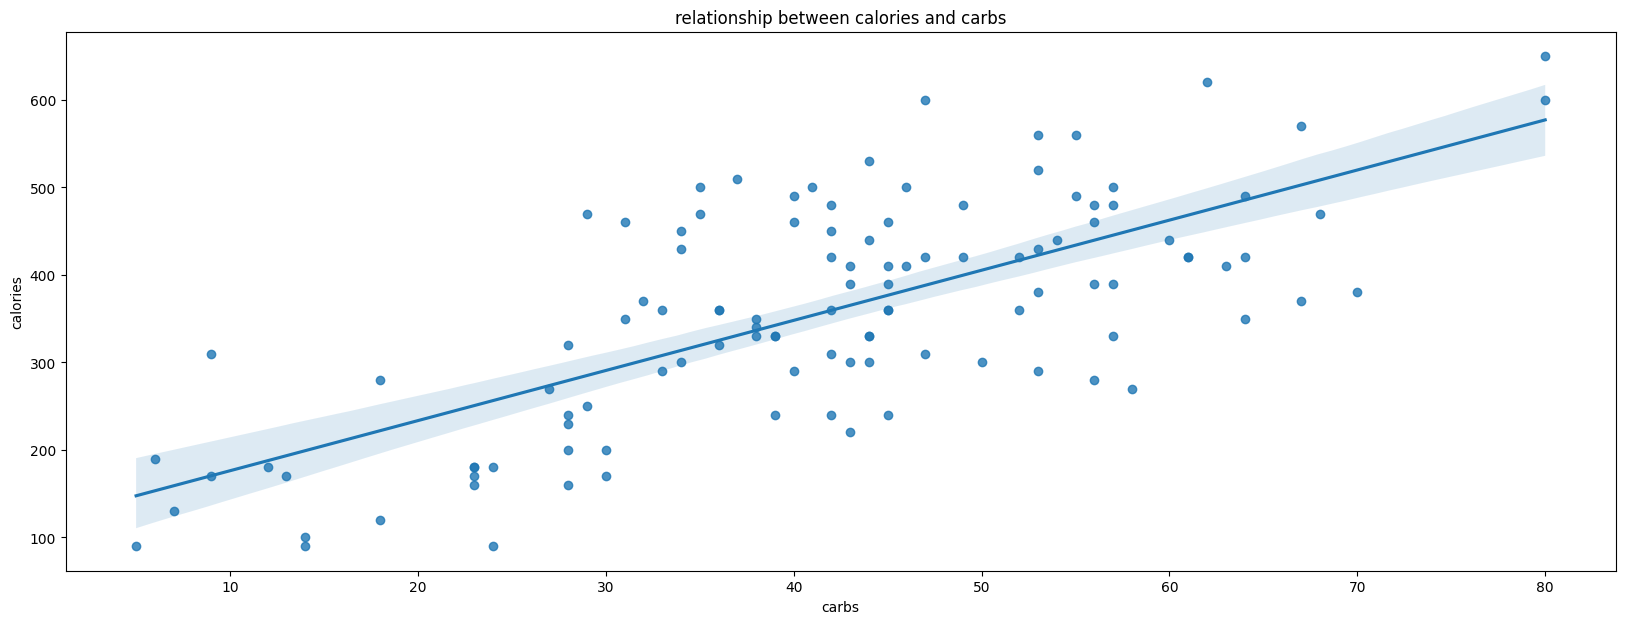

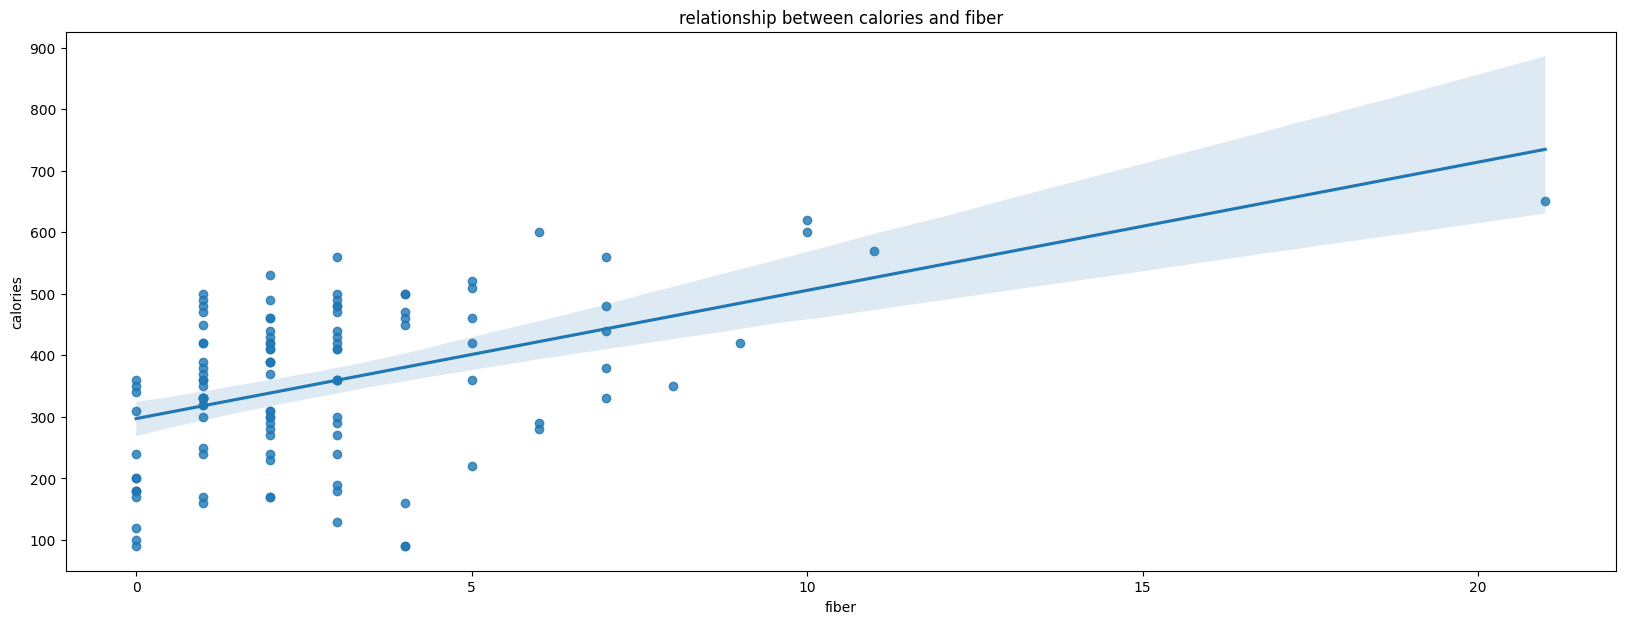

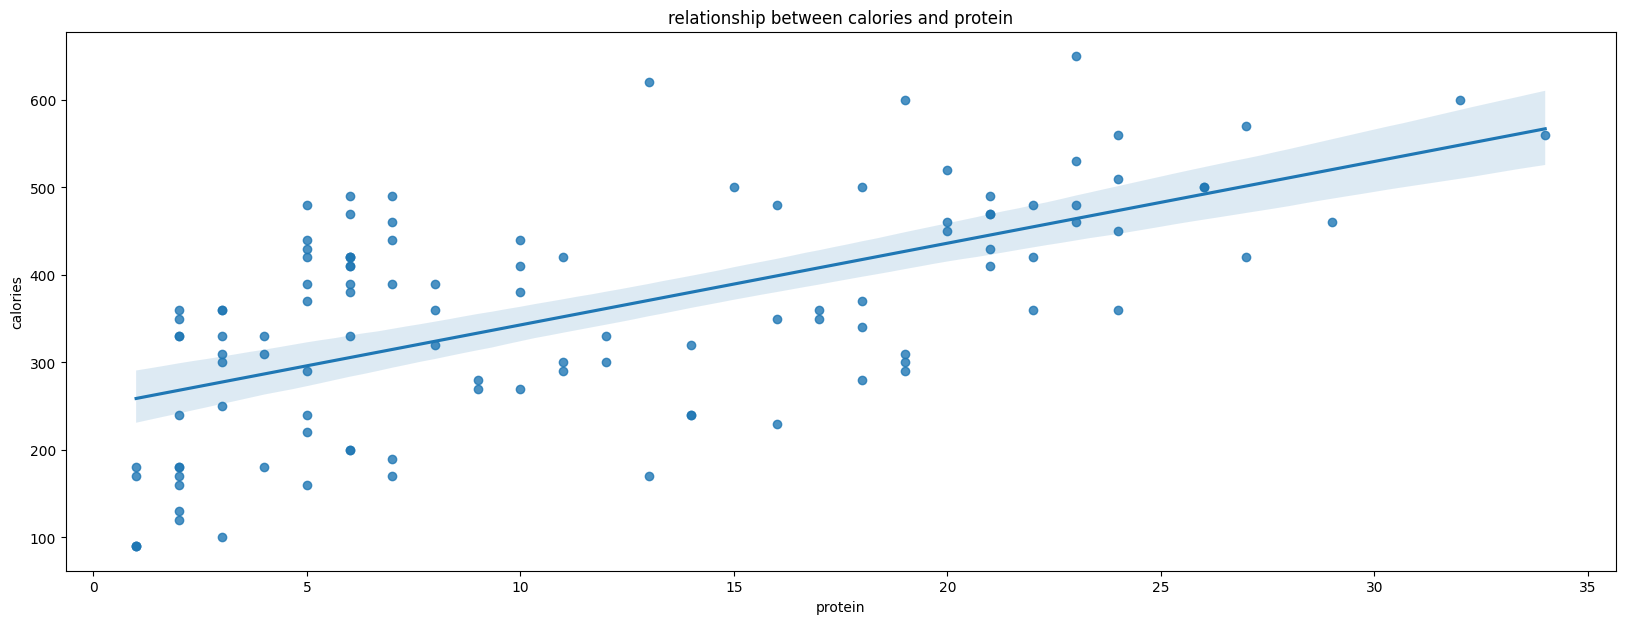

In [58]:
# Scatterplot of calories and fat content
for i in df.columns[1:]:
    plt.figure(figsize=(20,7))
    plt.title(f"relationship between calories and {i}")
    sns.regplot(y=df["calories"],x=df[i])
    plt.show()
    print()

In [64]:
# Build a multiple linear regression model to predict calories using other variables
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X=df.iloc[:,2:]
y=df["calories"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=23)

In [65]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.9944226886813153

In [66]:
y_pred=lr.predict(X_test)
y_pred

array([473.55236252, 454.58496694, 216.34779029, 494.10010256,
        89.60796588, 233.76674958, 271.74874084, 473.88500292,
       464.31267375, 575.66758404, 184.3935917 , 256.40987286,
       333.89103193, 423.88539876, 169.91402388, 503.44288821,
       179.5203647 , 175.46981924, 231.2031849 , 368.63603743,
       455.35458397, 486.28447942, 619.5991609 , 278.02209777,
       446.40314235, 437.69056392, 361.68981786, 378.61158437,
       289.25328666])

In [67]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("r2 score:",r2_score(y_test,y_pred))
print("Mean absolute error:",mean_absolute_error(y_test,y_pred))
print("Mean squared error:",mean_squared_error(y_test,y_pred))

r2 score: 0.9953487758282873
Mean absolute error: 6.210295005610185
Mean squared error: 87.99164871813221


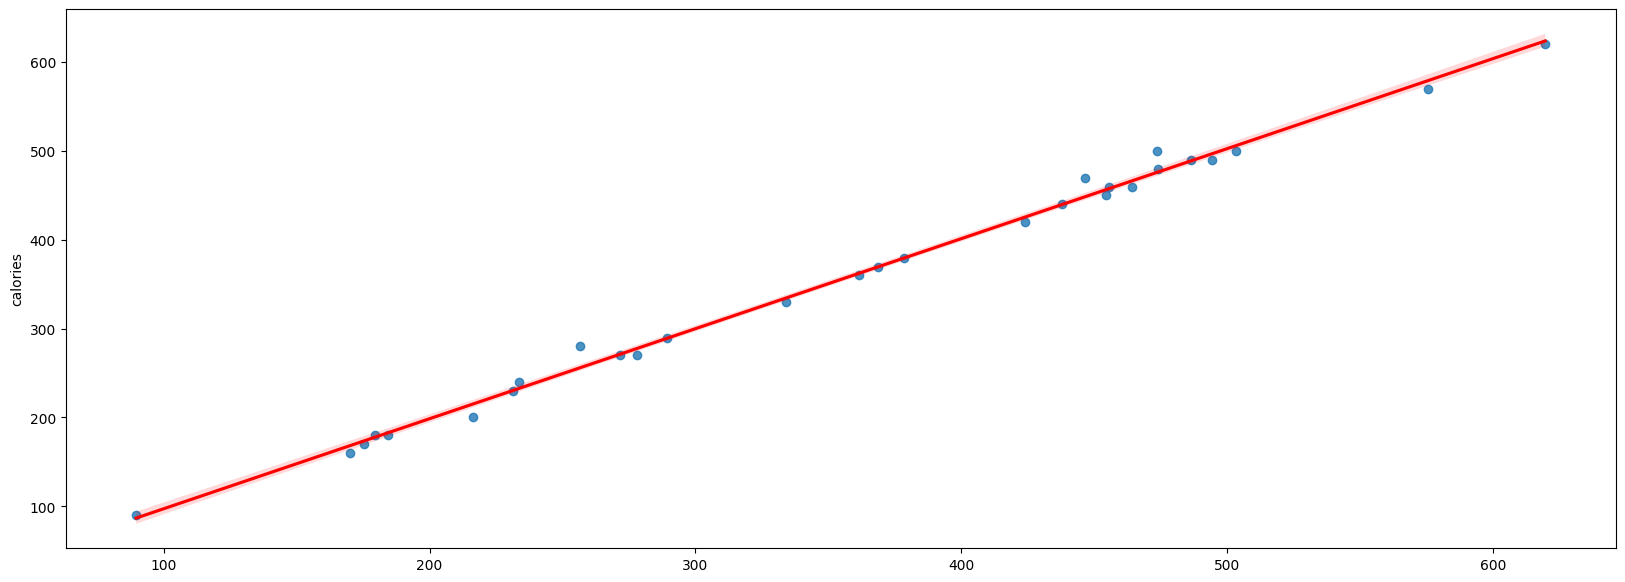

In [70]:
plt.figure(figsize=(20,7))
sns.regplot(y = y_test,x = y_pred,line_kws={"color":"red"})
plt.show()
# decent plot

In [ ]:
# This does not work. check dataset.target
from statsmodels.api import OLS
OLS(dataset.target,dataset.data).fit().summary()

# This works well
X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
results.summary() 
